## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Importing dataset

In [2]:
dataset = pd.read_csv('coin_Bitcoin.csv', header = 0)

In [4]:
dataset.head()

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09

## Deleting useless columns and setting new index

In [5]:
dataset = dataset.drop(['Volume', 'Symbol', 'Name', 'Marketcap', 'SNo'], axis = 1)

## Converting values in column Date into datetime64 dtype and check

In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2991 non-null   datetime64[ns]
 1   High    2991 non-null   float64       
 2   Low     2991 non-null   float64       
 3   Open    2991 non-null   float64       
 4   Close   2991 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 117.0 KB


In [8]:
dataset.dtypes

Date     datetime64[ns]
High            float64
Low             float64
Open            float64
Close           float64
dtype: object

## Setting new key index

In [9]:
dataset = dataset.set_index('Date')

In [10]:
dataset.head()

High         Low        Open       Close
Date                                                               
2013-04-29 23:59:59  147.488007  134.000000  134.444000  144.539993
2013-04-30 23:59:59  146.929993  134.050003  144.000000  139.000000
2013-05-01 23:59:59  139.889999  107.720001  139.000000  116.989998
2013-05-02 23:59:59  125.599998   92.281898  116.379997  105.209999
2013-05-03 23:59:59  108.127998   79.099998  106.250000   97.750000

## Saving as a new file in order to use it efectively

In [11]:
dataset.to_csv('modified_dataset.csv')

## Making some kind of plots

#### Helpful function

In [14]:
def plot_dataset(df, x, y, title="", color="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,6), dpi=dpi)
    plt.plot(x, y, color)
    plt.show()

In [18]:
dataset.index[1360:]

DatetimeIndex(['2017-01-18 23:59:59', '2017-01-19 23:59:59',
               '2017-01-20 23:59:59', '2017-01-21 23:59:59',
               '2017-01-22 23:59:59', '2017-01-23 23:59:59',
               '2017-01-24 23:59:59', '2017-01-25 23:59:59',
               '2017-01-26 23:59:59', '2017-01-27 23:59:59',
               ...
               '2021-06-27 23:59:59', '2021-06-28 23:59:59',
               '2021-06-29 23:59:59', '2021-06-30 23:59:59',
               '2021-07-01 23:59:59', '2021-07-02 23:59:59',
               '2021-07-03 23:59:59', '2021-07-04 23:59:59',
               '2021-07-05 23:59:59', '2021-07-06 23:59:59'],
              dtype='datetime64[ns]', name='Date', length=1631, freq=None)

In [20]:
dataset['Log'] = np.log(dataset.Open)

In [32]:
dataset['Diff'] = np.diff(dataset.Open, append = 30000)

In [35]:
dataset['Diff+Log'] = np.log(dataset.Diff)

c:\users\orest\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\orest\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
dataset['Log+Diff'] = np.diff(dataset.Log, append = 10)

In [43]:
dataset.head(-5)

High           Low          Open         Close  \
Date                                                                          
2013-04-29 23:59:59    147.488007    134.000000    134.444000    144.539993   
2013-04-30 23:59:59    146.929993    134.050003    144.000000    139.000000   
2013-05-01 23:59:59    139.889999    107.720001    139.000000    116.989998   
2013-05-02 23:59:59    125.599998     92.281898    116.379997    105.209999   
2013-05-03 23:59:59    108.127998     79.099998    106.250000     97.750000   
...                           ...           ...           ...           ...   
2021-06-27 23:59:59  34656.127356  32071.757148  32287.523211  34649.644588   
2021-06-28 23:59:59  35219.891791  33902.075892  34679.122222  34434.335314   
2021-06-29 23:59:59  36542.111018  34252.484892  34475.559697  35867.777735   
2021-06-30 23:59:59  36074.759757  34086.151878  35908.388054  35040.837249   
2021-07-01 23:59:59  35035.982712  32883.781226  35035.982712  33572.117653   

                           Log         Diff  Diff+Log  Log+Diff  
Date                                                             
2013-04-29 23:59:59   4.901148     9.556000  2.257169  0.068666  
2013-04-30 23:59:59   4.969813    -5.000000       NaN -0.035339  
2013-05-01 23:59:59   4.934474   -22.620003       NaN -0.177613  
2013-05-02 23:59:59   4.756861   -10.129997       NaN -0.091066  
2013-05-03 23:59:59   4.665795    -8.150002       NaN -0.079807  
...                        ...          ...       ...       ...  
2021-06-27 23:59:59  10.382436  2391.599011  7.779717  0.071457  
2021-06-28 23:59:59  10.453893  -203.562525       NaN -0.005887  
2021-06-29 23:59:59  10.448006  1432.828357  7.267406  0.040720  
2021-06-30 23:59:59  10.488726  -872.405342       NaN -0.024595  
2021-07-01 23:59:59  10.464131 -1486.382535       NaN -0.043351  

[2986 rows x 8 columns]

### Plot for Open

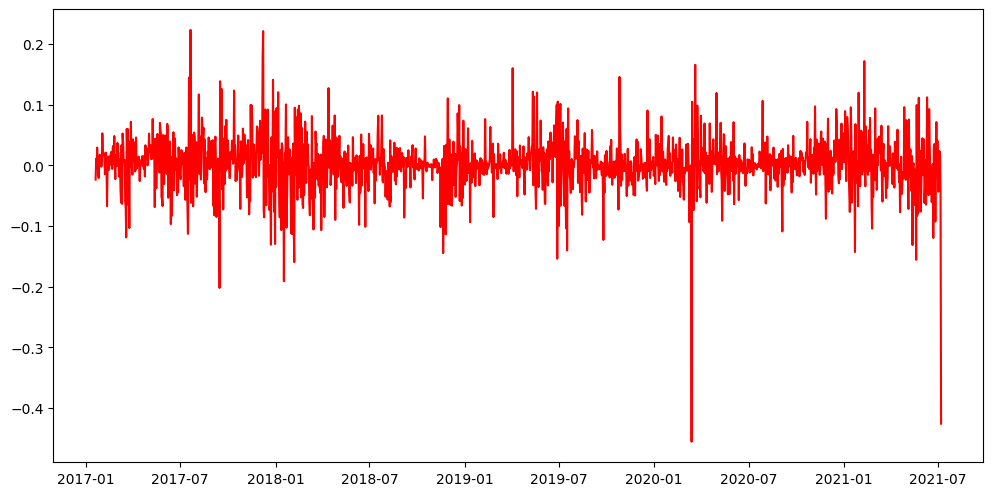

In [44]:
plot_dataset(dataset, dataset.index[1360:], dataset['Log+Diff'][1360:], "Exchange open-value per day", 'r')

In [59]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


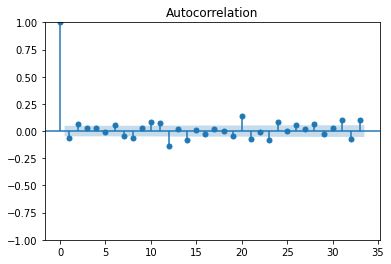

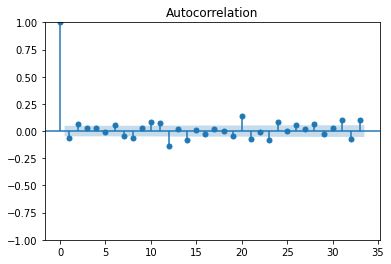

In [62]:
plot_acf(dataset.Diff[1360:])

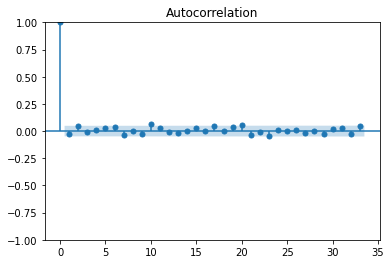

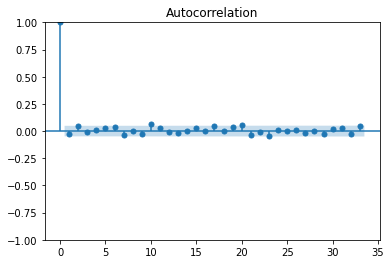

In [64]:
plot_acf(dataset['Log+Diff'][1360:])

### Plot for High

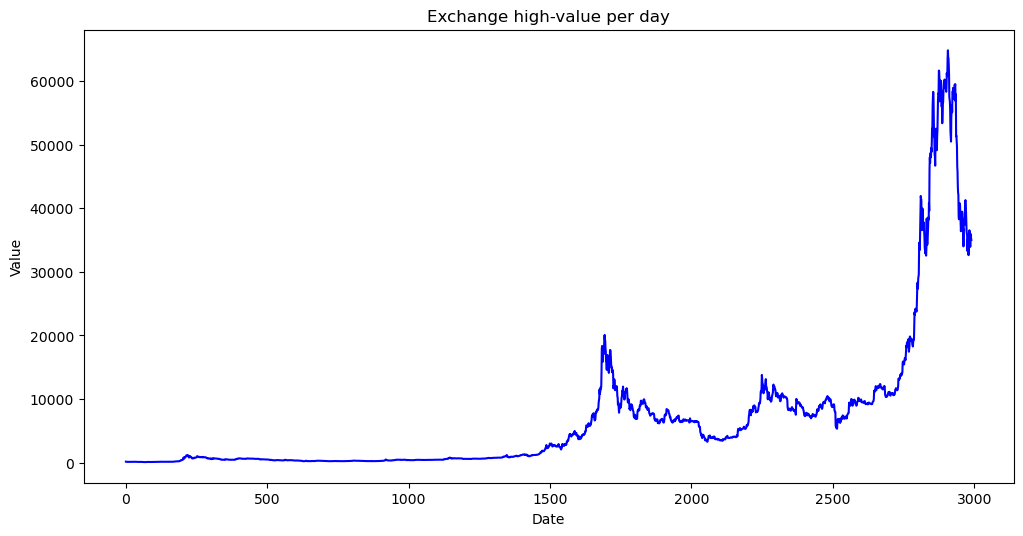

In [42]:
plot_dataset(dataset, dataset.index, dataset.High, "Exchange high-value per day", 'blue')

### Plot for Low

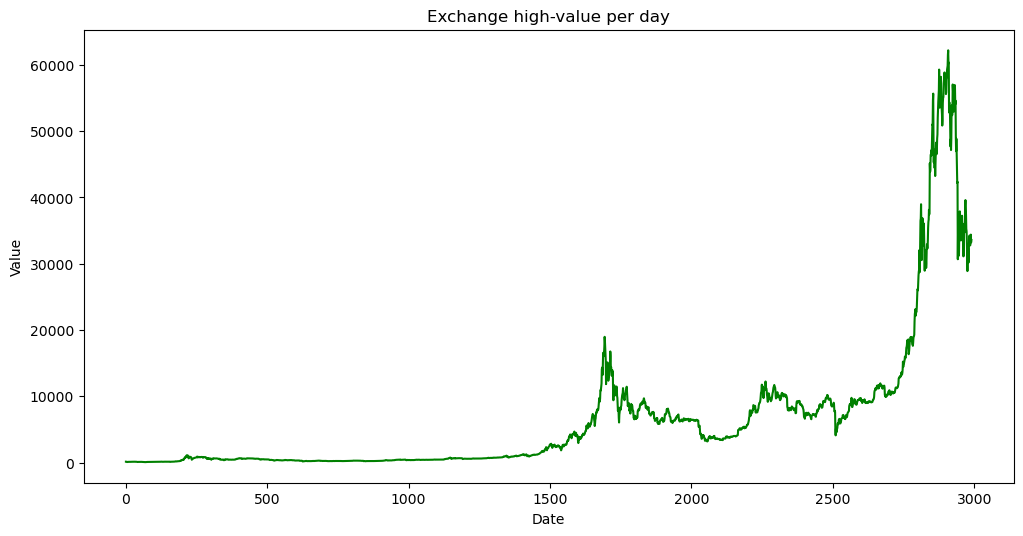

In [43]:
plot_dataset(dataset, dataset.index, dataset.Low, "Exchange high-value per day", 'green')

### Plot for Close

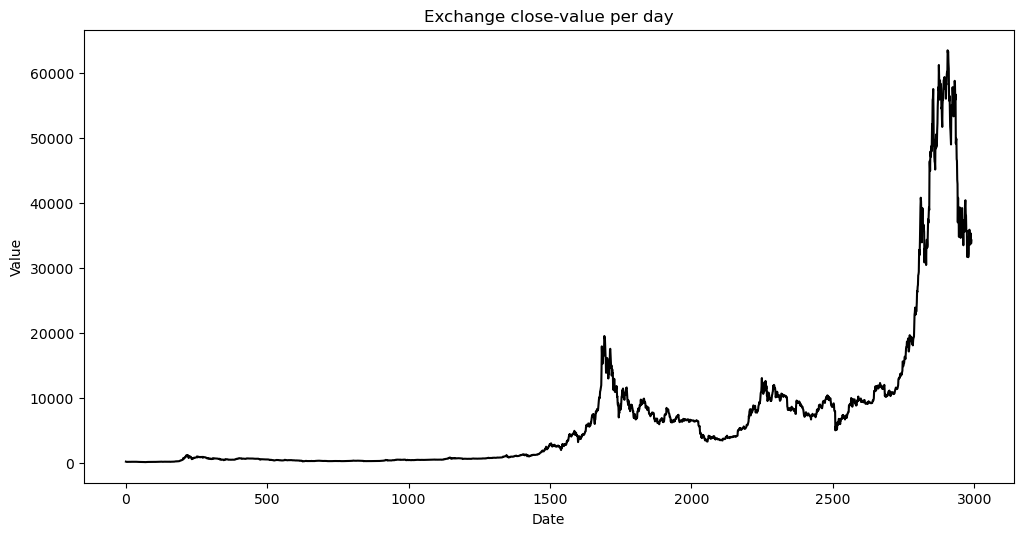

In [44]:
plot_dataset(dataset, dataset.index, dataset.Close, "Exchange close-value per day", 'black')

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution
 You can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.The boxplots make the year-wise and month-wise distributions evident

In [22]:
dataset = pd.read_csv('modified_dataset.csv', header = 0)
dataset.reset_index(inplace = True)
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Years'] = [d.year for d in dataset.Date]
dataset['Monthes'] = [d.month for d in dataset.Date]
years = dataset['Years'].unique()

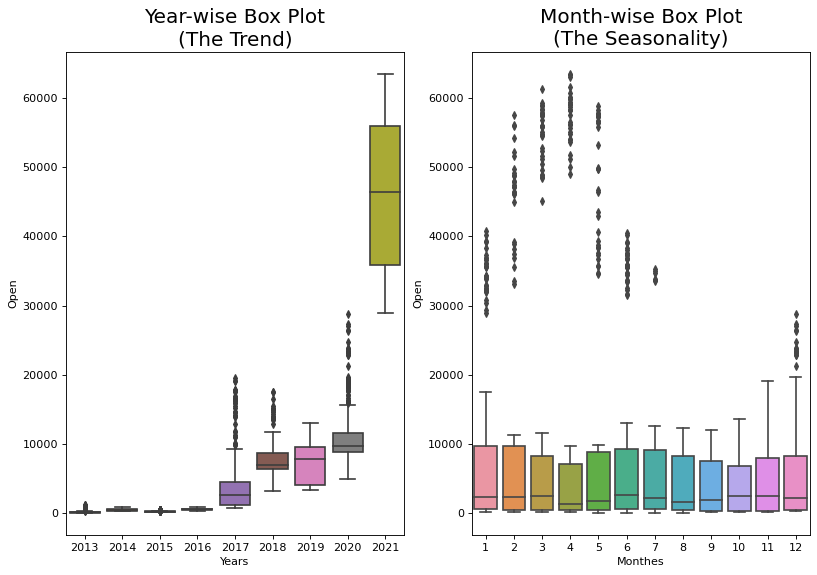

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), dpi= 80)
sns.boxplot(x = dataset['Years'], y = dataset['Open'], data = dataset, ax = axes[0])
sns.boxplot(x = dataset['Monthes'], y = dataset['Open'], data = dataset.loc[~dataset.Years.isin([2017, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

*Additive time series:*

Value = Base Level + Trend + Seasonality + Error

*Multiplicative Time Series:*

Value = Base Level x Trend x Seasonality x Error

### Decomposing our time series into its components
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [66]:
dataset = pd.read_csv('modified_dataset.csv', parse_dates=['Date'], index_col='Date')

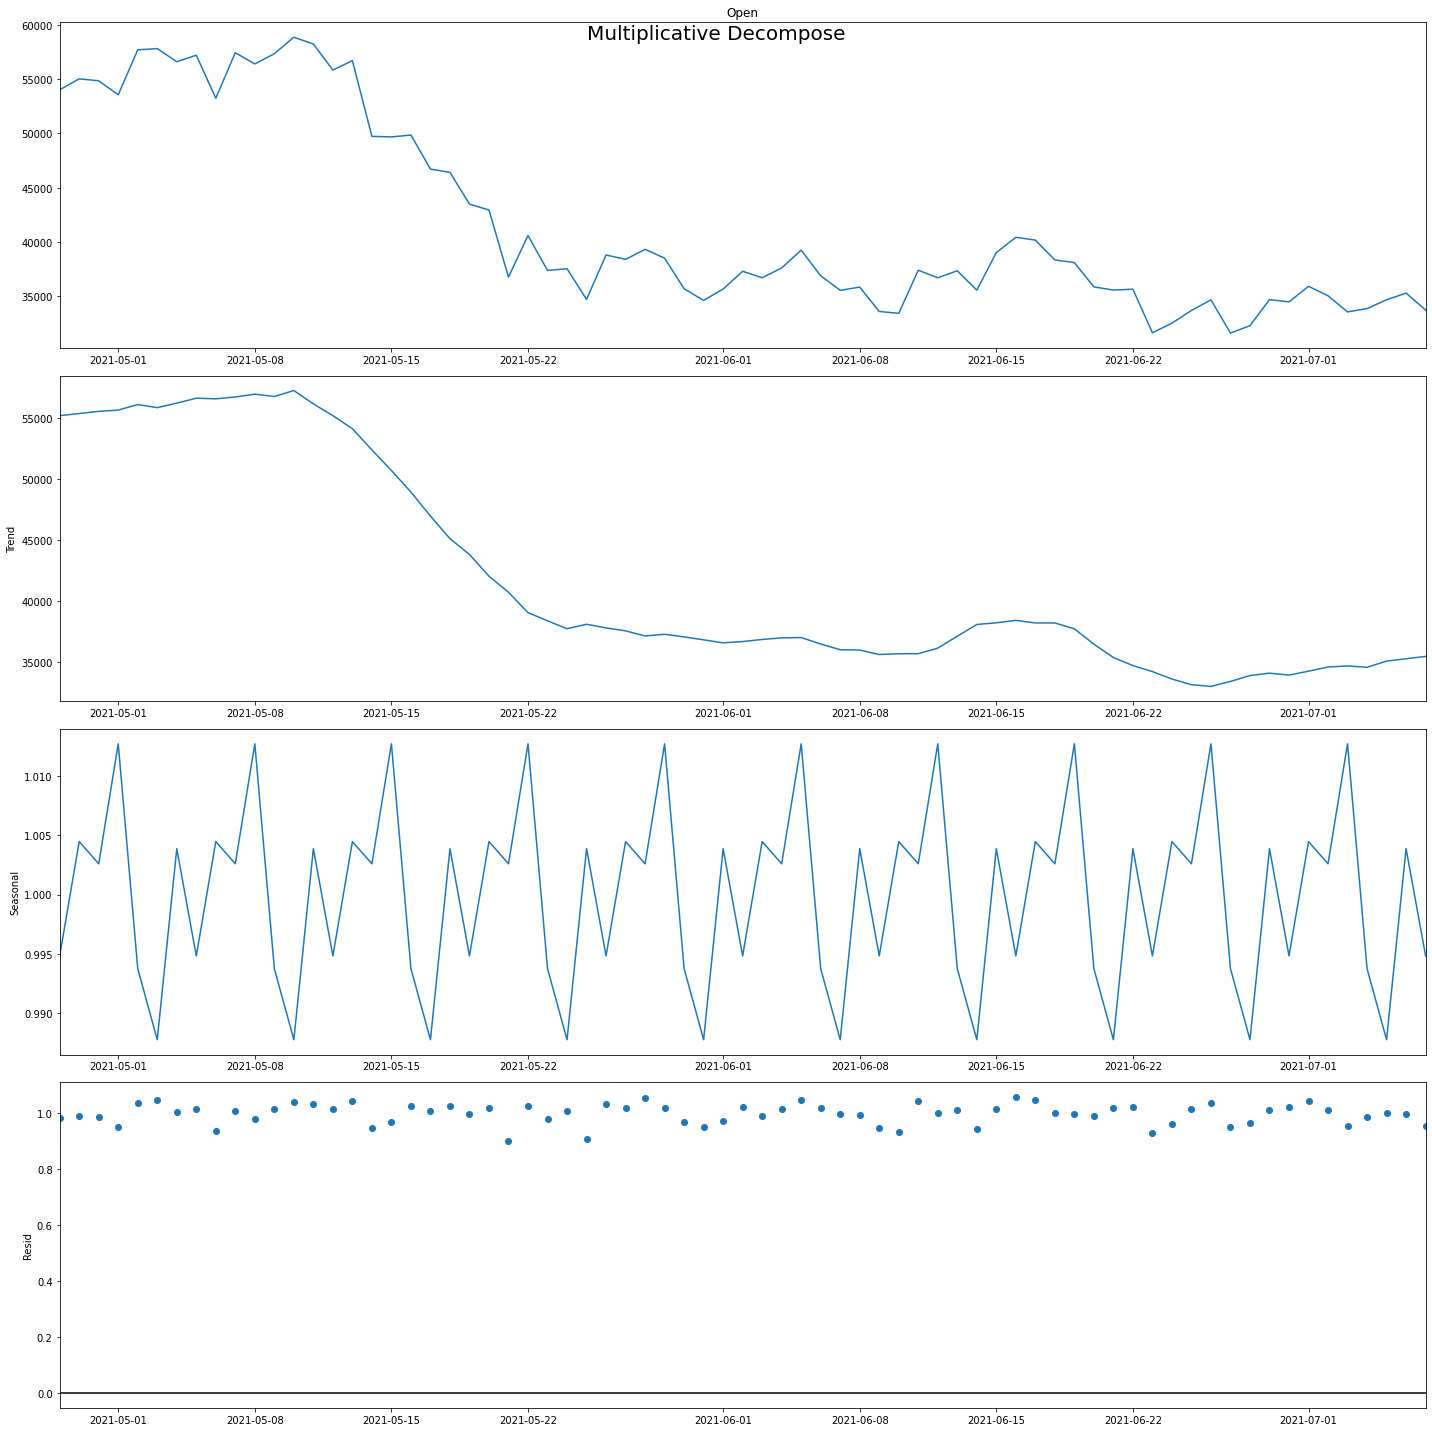

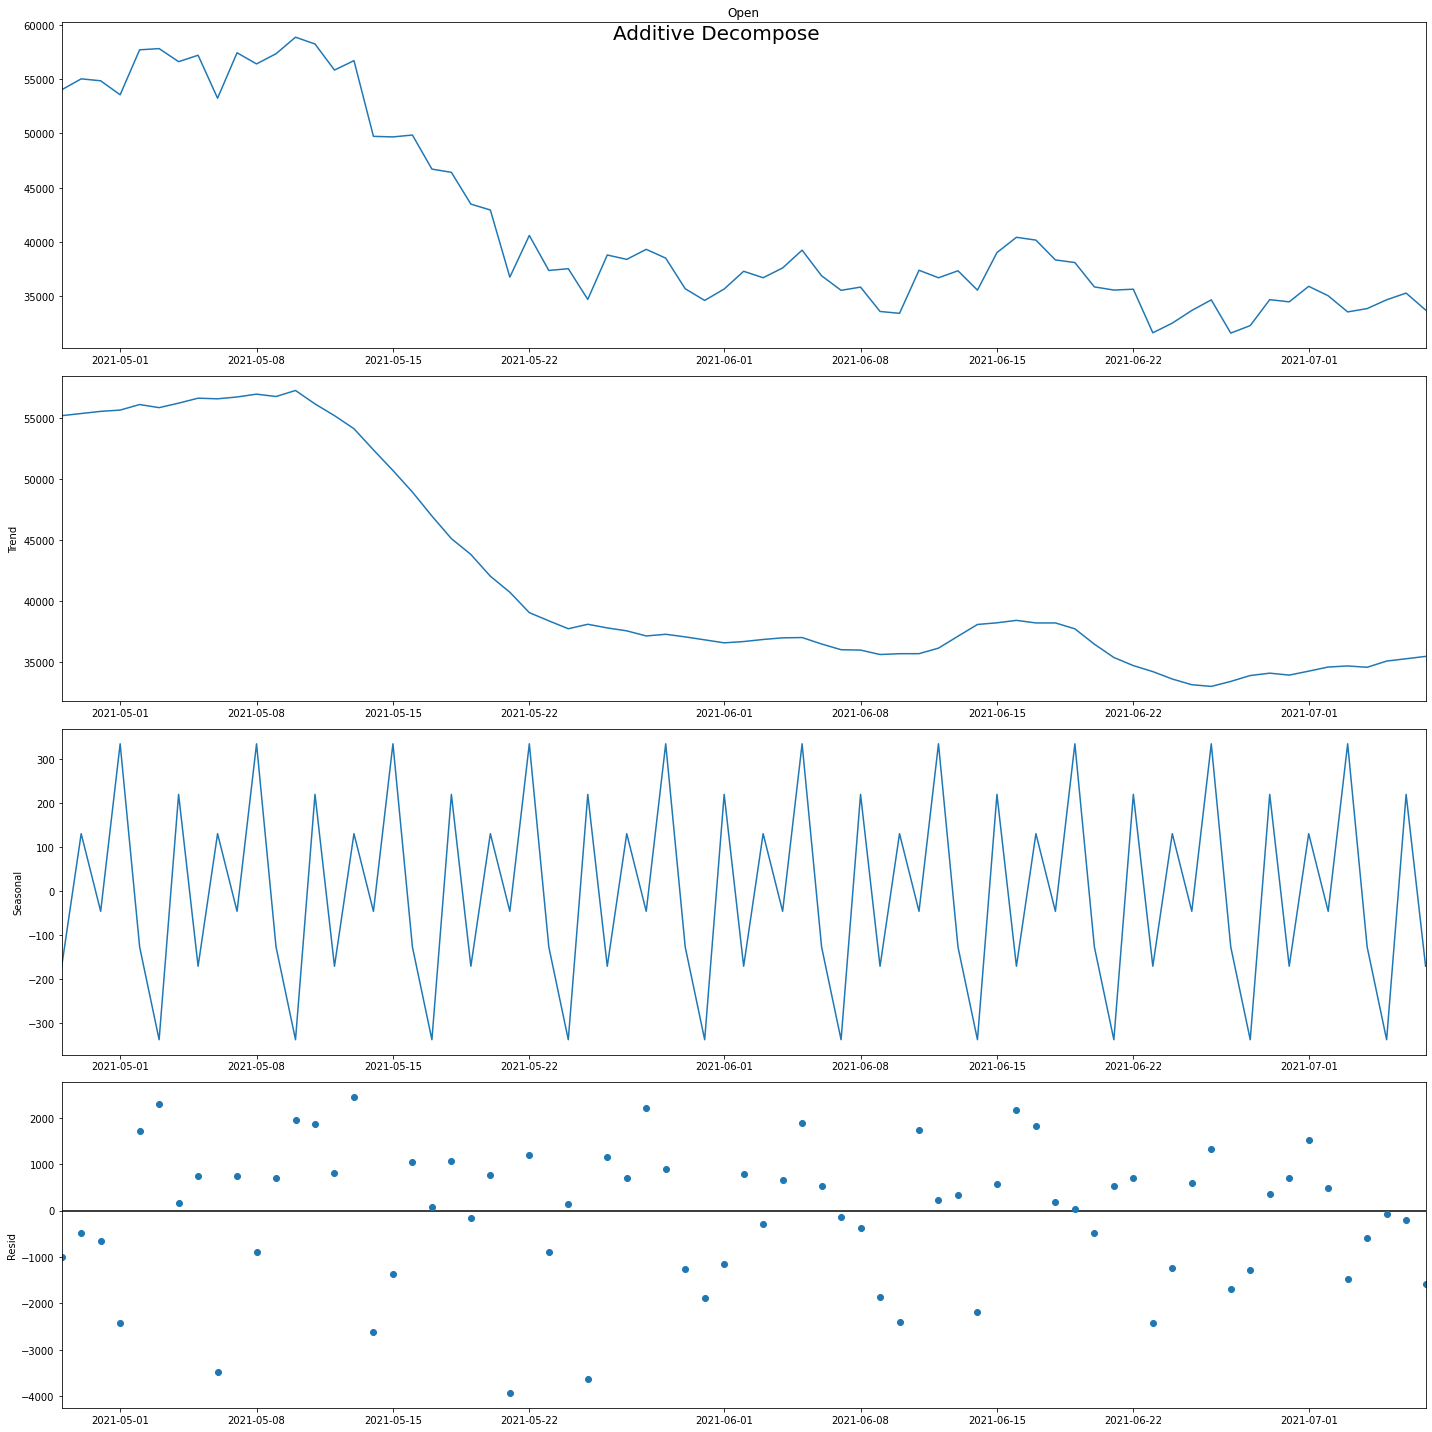

In [69]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(dataset['Open'][2920:], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(dataset['Open'][2920:], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=20)
result_add.plot().suptitle('Additive Decompose', fontsize=20)
plt.show()

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [70]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
dataset_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
dataset_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
dataset_reconstructed.head(-5)

seas         trend     resid  actual_values
Date                                                                
2021-04-27 23:59:59  0.994827  55206.954192  0.983776   54030.303718
2021-04-28 23:59:59  1.004473  55383.206123  0.989318   55036.637419
2021-04-29 23:59:59  1.002598  55559.458053  0.984818   54858.091492
2021-04-30 23:59:59  1.012725  55664.928073  0.950249   53568.663584
2021-05-01 23:59:59  0.993751  56119.767365  1.034886   57714.664858
...                       ...           ...       ...            ...
2021-06-27 23:59:59  0.987753  33898.165951  0.964296   32287.523211
2021-06-28 23:59:59  1.003874  34091.477710  1.013312   34679.122222
2021-06-29 23:59:59  0.994827  33932.977092  1.021273   34475.559697
2021-06-30 23:59:59  1.004473  34255.799634  1.043575   35908.388054
2021-07-01 23:59:59  1.002598  34595.519870  1.010108   35035.982712

[66 rows x 4 columns]

### Weekly price relationship

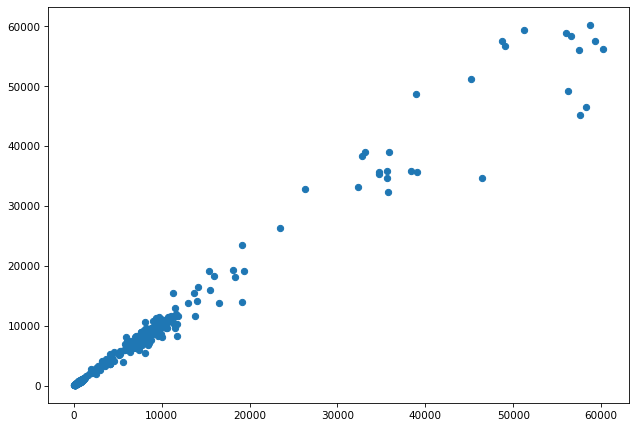

In [140]:
x = dataset.Open.values[np.where(np.array(dataset.Open.index)%7==0)]
plt.figure(figsize=(10, 7), dpi=75)
plt.scatter(x[:-1], x[1:])

### Monthly price relationship

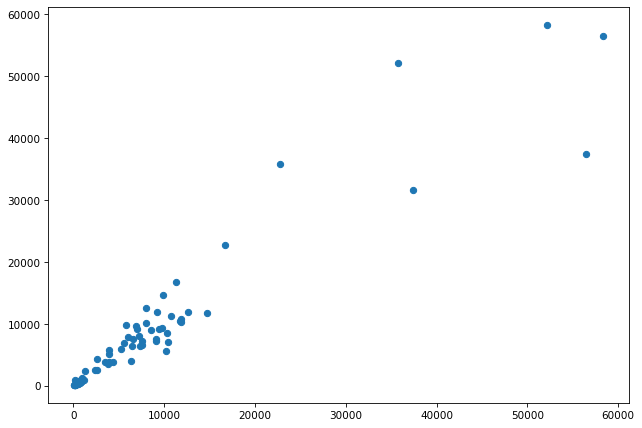

In [142]:
y = dataset.Open.values[np.where(np.array(dataset.Open.index)%31==0)]
plt.figure(figsize=(10, 7), dpi=75)
plt.scatter(x[:-1], x[1:])